Vocab size: 20364
Number of tags: 23
Max sentence length: 84
X_train shape: (8086, 84)
y_train shape: (8086, 84, 23)
X_test shape: (2022, 84)
y_test shape: (2022, 84, 23)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 84, 100)        │     2,036,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 84, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 84, 256)        │       176,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 84, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 84, 256)        │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 84, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 84, 256)        │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 84, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 84, 23)         │         5,911 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,811,847 (10.73 MB)

 Trainable params: 2,811,847 (10.73 MB)

 Non-trainable params: 0 (0.00 B)


Training the GRU model...
Epoch 1/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.8355 - loss: 0.6951 - val_accuracy: 0.8989 - val_loss: 0.3197
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.9079 - loss: 0.2865 - val_accuracy: 0.9441 - val_loss: 0.1668
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9479 - loss: 0.1528 - val_accuracy: 0.9533 - val_loss: 0.1354
Epoch 4/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9586 - loss: 0.1154 - val_accuracy: 0.9551 - val_loss: 0.1304
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.9624 - loss: 0.1008 - val_accuracy: 0.9530 - val_loss: 0.1298
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9645 - loss: 0.0914 - val_accuracy: 0.9562 - val_loss: 0.1360
Epoch 7/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9673 - loss: 0.0826 - val_accuracy: 0.9530 - val_loss: 0.1398
Epoch 8/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 

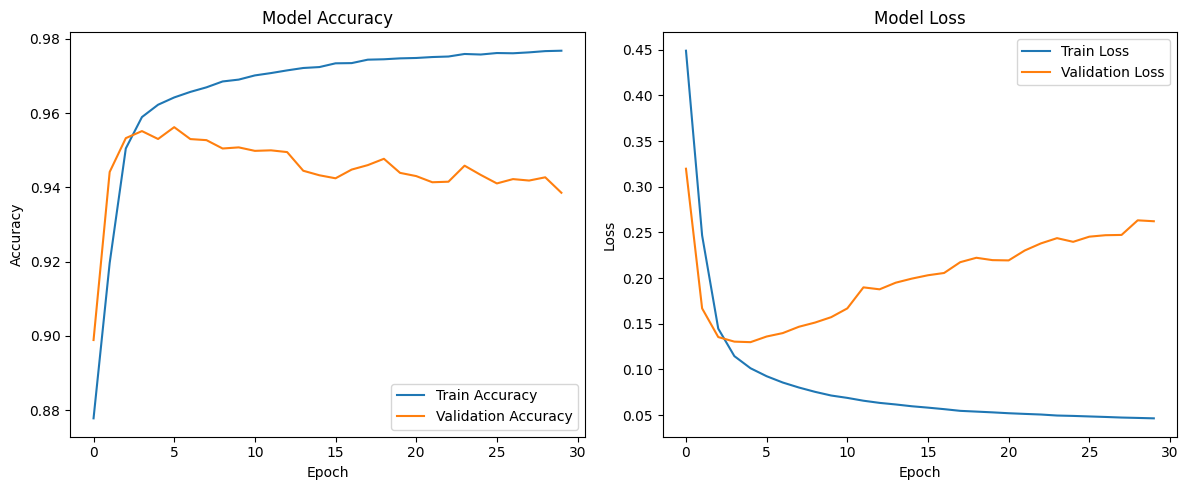


--- Evaluating Model on Test Set (GRU) ---
Test Loss (GRU): 0.2622
Test Accuracy (GRU): 0.9385
------------------------------

--- Testing with a Custom Sentence (GRU Model) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Sentence: 'रोहित पवार पक्षाचे नवे अध्यक्ष.'
Predicted POS: रोहित/nnp पवार/nnp पक्षाचे/nn नवे/jj अध्यक्ष./nn
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Sentence: 'माझा नवीन मित्र आला.'
Predicted POS: माझा/prp नवीन/jj मित्र/nn आला./nn
------------------------------


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout, TimeDistributed # Changed LSTM to GRU
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os
import matplotlib.pyplot as plt

# --- Configuration ---
DATA_FILE = '/content/dataframe_no_missing_values.csv'
EMBEDDING_DIM = 100 # Dimension for word embeddings
GRU_UNITS = 128 # Number of units in the BiGRU layer (renamed from LSTM_UNITS)
BATCH_SIZE = 64
EPOCHS = 30
TEST_SIZE = 0.2

# Define the allowed POS tags
ALLOWED_POS_TAGS = [
    'NN', 'NST', 'NNP', 'PRP', 'DEM', 'VM', 'VAUX', 'JJ', 'RB', 'PSP',
    'RP', 'QF', 'QC', 'CC', 'WQ', 'QO', 'INTF', 'INJ', 'NEG', 'SYM',
    'XC', 'UNK'
]

# --- Load the dataset ---
if not os.path.exists(DATA_FILE):
    print(f"Error: {DATA_FILE} not found. Please upload it to your Colab session.")
    exit()

df = pd.read_csv(DATA_FILE)

# Preprocess the data
df.columns = df.columns.str.strip()
df.dropna(subset=['Tokenized Sentence', 'POS Tags'], inplace=True)
df = df[df['Tokenized Sentence'].astype(str).str.strip() != '']
df = df[df['POS Tags'].astype(str).str.strip() != '']

# Handle potential float values by converting them to strings before splitting
sentences = df['Tokenized Sentence'].astype(str).apply(lambda x: x.split()).tolist()
original_pos_tags_nested = df['POS Tags'].astype(str).apply(lambda x: x.split()).tolist()

# --- Map original POS tags to allowed set or 'UNK' ---
processed_pos_tags = []
for sentence_tags in original_pos_tags_nested:
    new_sentence_tags = []
    for tag in sentence_tags:
        if tag in ALLOWED_POS_TAGS:
            new_sentence_tags.append(tag)
        else:
            new_sentence_tags.append('UNK')
    processed_pos_tags.append(new_sentence_tags)

# --- Create vocabulary and POS tag sets ---
word_tokenizer = Tokenizer(oov_token='<OOV>')
word_tokenizer.fit_on_texts(sentences)
vocab_size = len(word_tokenizer.word_index) + 1 # +1 for padding/OOV

tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(processed_pos_tags)
num_tags = len(tag_tokenizer.word_index) + 1 # +1 for padding

if 'UNK' not in tag_tokenizer.word_index:
    print("Warning: 'UNK' tag not found in dataset. Ensure 'UNK' is correctly handled if it's expected.")

# Convert words and tags to sequences
X = word_tokenizer.texts_to_sequences(sentences)
y = tag_tokenizer.texts_to_sequences(processed_pos_tags)

# --- Pad sequences ---
max_len = max(len(s) for s in sentences)
X = pad_sequences(X, maxlen=max_len, padding='post')
y = pad_sequences(y, maxlen=max_len, padding='post')

# --- Convert y to categorical (one-hot encoding) ---
y = tf.keras.utils.to_categorical(y, num_classes=num_tags)

# --- Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

print(f"Vocab size: {vocab_size}")
print(f"Number of tags: {num_tags}")
print(f"Max sentence length: {max_len}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# --- GRU Model Definition ---
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=EMBEDDING_DIM,
              input_length=max_len),
    Dropout(0.3),
    # First BiGRU layer
    Bidirectional(GRU(units=GRU_UNITS, # Changed to GRU
                      return_sequences=True,
                      activation='tanh')), # GRU also commonly uses tanh for recurrent activation
    Dropout(0.3),
    # Second BiGRU layer
    Bidirectional(GRU(units=GRU_UNITS, # Changed to GRU
                      return_sequences=True,
                      activation='tanh')),
    Dropout(0.3),
    # Third BiGRU layer
    Bidirectional(GRU(units=GRU_UNITS, # Changed to GRU
                      return_sequences=True,
                      activation='tanh')),
    Dropout(0.3),
    # TimeDistributed Dense layer to classify each word's output
    TimeDistributed(Dense(num_tags, activation='softmax'))
])

# --- Compile the model ---
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- Model summary ---
model.build(input_shape=(None, max_len))
model.summary()
print("\nTraining the GRU model...")
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test),
                    verbose=1)

# --- Evaluation Function (same as before) ---
def evaluate_model(model, X_test, y_test, tag_tokenizer):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=-1)
    y_test_original_ids = np.argmax(y_test, axis=-1)

    y_pred_flat = y_pred.flatten()
    y_test_flat = y_test_original_ids.flatten()

    idx_to_tag = {v: k for k, v in tag_tokenizer.word_index.items()}
    if 0 not in idx_to_tag and tag_tokenizer.word_index.get('pad_token') is None:
        idx_to_tag[0] = '<PAD>'

    mask = y_test_flat != 0
    y_pred_filtered = y_pred_flat[mask]
    y_test_filtered = y_test_flat[mask]

    unique_labels_in_test = np.unique(y_test_filtered).tolist()
    report_target_names = [idx_to_tag[label_id] for label_id in sorted(unique_labels_in_test)]

    print("\n--- Evaluation Report (Ignoring Padding) ---")
    print(classification_report(y_test_filtered, y_pred_filtered,
                                labels=sorted(unique_labels_in_test),
                                target_names=report_target_names,
                                zero_division=0))

evaluate_model(model, X_test, y_test, tag_tokenizer)

# --- Plot training history (same as before) ---
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_history(history)

# --- Evaluate Model on Test Set (explicitly requested) ---
print("\n--- Evaluating Model on Test Set (GRU) ---")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (GRU): {test_loss:.4f}")
print(f"Test Accuracy (GRU): {test_accuracy:.4f}")
print("-" * 30)


# --- Function to predict POS tags for a new sentence (same as before) ---
def predict_pos_tags(sentence, model, word_tokenizer, tag_tokenizer, max_len):
    if isinstance(sentence, str):
        words = sentence.split()
    else:
        words = sentence

    sequence = word_tokenizer.texts_to_sequences([words])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')
    predictions = model.predict(padded_sequence)
    predicted_tag_indices = np.argmax(predictions, axis=-1)[0]

    idx_to_tag = {v: k for k, v in tag_tokenizer.word_index.items()}
    if 0 not in idx_to_tag and tag_tokenizer.word_index.get('pad_token') is None:
        idx_to_tag[0] = '<PAD>'

    predicted_tags = []
    for i, tag_id in enumerate(predicted_tag_indices):
        if tag_id != 0 and i < len(words):
            predicted_tags.append(idx_to_tag.get(tag_id, 'UNKNOWN_TAG_ID'))

    aligned_output = []
    for i, word in enumerate(words):
        if i < len(predicted_tags):
            aligned_output.append(f"{word}/{predicted_tags[i]}")
        else:
            aligned_output.append(f"{word}/<NO_PREDICTION>")

    return " ".join(aligned_output)

# --- Example Usage for a new sentence ---
print("\n--- Testing with a Custom Sentence (GRU Model) ---")

test_sentence_1 = "रोहित पवार पक्षाचे नवे अध्यक्ष."
predicted_output_1 = predict_pos_tags(test_sentence_1, model, word_tokenizer, tag_tokenizer, max_len)
print(f"Sentence: '{test_sentence_1}'")
print(f"Predicted POS: {predicted_output_1}")
print("-" * 30)

# You can add more test sentences here if desired
test_sentence_2 = "माझा नवीन मित्र आला." # "Maza navin mitra aala." (My new friend came.)
predicted_output_2 = predict_pos_tags(test_sentence_2, model, word_tokenizer, tag_tokenizer, max_len)
print(f"Sentence: '{test_sentence_2}'")
print(f"Predicted POS: {predicted_output_2}")
print("-" * 30)

Vocab size: 20364
Number of tags: 23
Max sentence length: 84
X_train shape: (8086, 84)
y_train shape: (8086, 84, 23)
X_test shape: (2022, 84)
y_test shape: (2022, 84, 23)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 84, 100)        │     2,036,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 84, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 84, 256)        │       176,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 84, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 84, 256)        │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 84, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 84, 256)        │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 84, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 84, 23)         │         5,911 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,811,847 (10.73 MB)

 Trainable params: 2,811,847 (10.73 MB)

 Non-trainable params: 0 (0.00 B)


Training the GRU model...
Epoch 1/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.8370 - loss: 0.6887 - val_accuracy: 0.8989 - val_loss: 0.3214
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9056 - loss: 0.2978 - val_accuracy: 0.9420 - val_loss: 0.1755
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9463 - loss: 0.1581 - val_accuracy: 0.9531 - val_loss: 0.1361
Epoch 4/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9588 - loss: 0.1161 - val_accuracy: 0.9536 - val_loss: 0.1305
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9629 - loss: 0.1009 - val_accuracy: 0.9549 - val_loss: 0.1311
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9649 - loss: 0.0924 - val_accuracy: 0.9541 - val_loss: 0.1349
Epoch 7/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9667 - loss: 0.0844 - val_accuracy: 0.9481 - val_loss: 0.1397
Epoch 8/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 

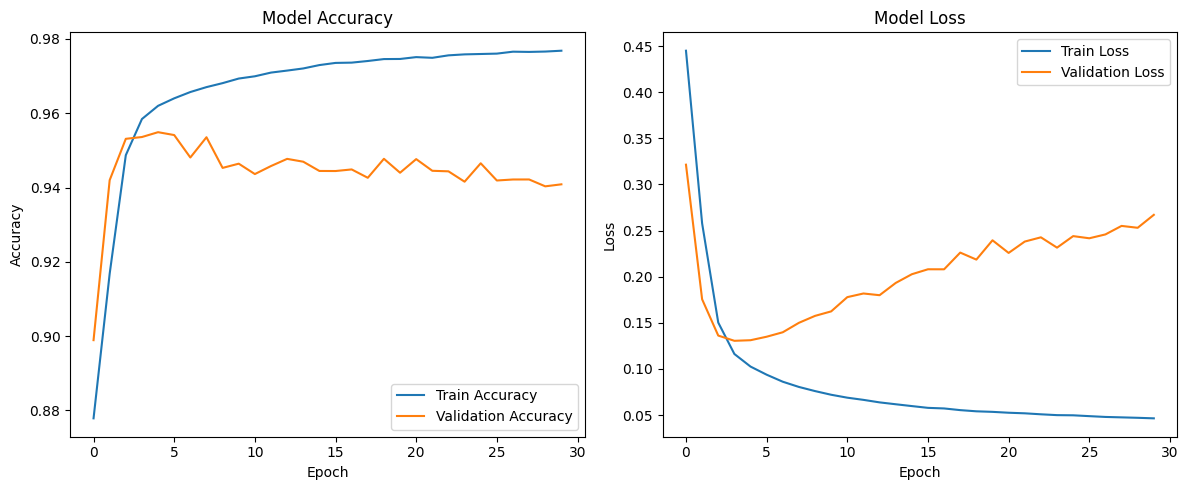


--- Evaluating Model on Test Set (GRU) ---
Test Loss (GRU): 0.2670
Test Accuracy (GRU): 0.9409
------------------------------

--- Overall Model F1 Score (Ignoring Padding) ---
Overall F1 Score (weighted average): 0.6603
------------------------------

--- Testing with a Custom Sentence (GRU Model) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Sentence: 'रोहित पवार पक्षाचे नवे अध्यक्ष.'
Predicted POS: रोहित/nnp पवार/nnp पक्षाचे/nn नवे/jj अध्यक्ष./sym
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Sentence: 'माझा नवीन मित्र आला.'
Predicted POS: माझा/prp नवीन/jj मित्र/nn आला./unk
------------------------------


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout, TimeDistributed
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score # Import f1_score
import os
import matplotlib.pyplot as plt

# --- Configuration ---
DATA_FILE = '/content/dataframe_no_missing_values.csv'
EMBEDDING_DIM = 100 # Dimension for word embeddings
GRU_UNITS = 128 # Number of units in the BiGRU layer (renamed from LSTM_UNITS)
BATCH_SIZE = 64
EPOCHS = 30
TEST_SIZE = 0.2

# Define the allowed POS tags
ALLOWED_POS_TAGS = [
    'NN', 'NST', 'NNP', 'PRP', 'DEM', 'VM', 'VAUX', 'JJ', 'RB', 'PSP',
    'RP', 'QF', 'QC', 'CC', 'WQ', 'QO', 'INTF', 'INJ', 'NEG', 'SYM',
    'XC', 'UNK'
]

# --- Load the dataset ---
if not os.path.exists(DATA_FILE):
    print(f"Error: {DATA_FILE} not found. Please upload it to your Colab session.")
    exit()

df = pd.read_csv(DATA_FILE)

# Preprocess the data
df.columns = df.columns.str.strip()
df.dropna(subset=['Tokenized Sentence', 'POS Tags'], inplace=True)
df = df[df['Tokenized Sentence'].astype(str).str.strip() != '']
df = df[df['POS Tags'].astype(str).str.strip() != '']

# Handle potential float values by converting them to strings before splitting
sentences = df['Tokenized Sentence'].astype(str).apply(lambda x: x.split()).tolist()
original_pos_tags_nested = df['POS Tags'].astype(str).apply(lambda x: x.split()).tolist()

# --- Map original POS tags to allowed set or 'UNK' ---
processed_pos_tags = []
for sentence_tags in original_pos_tags_nested:
    new_sentence_tags = []
    for tag in sentence_tags:
        if tag in ALLOWED_POS_TAGS:
            new_sentence_tags.append(tag)
        else:
            new_sentence_tags.append('UNK')
    processed_pos_tags.append(new_sentence_tags)

# --- Create vocabulary and POS tag sets ---
word_tokenizer = Tokenizer(oov_token='<OOV>')
word_tokenizer.fit_on_texts(sentences)
vocab_size = len(word_tokenizer.word_index) + 1 # +1 for padding/OOV

tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(processed_pos_tags)
num_tags = len(tag_tokenizer.word_index) + 1 # +1 for padding

if 'UNK' not in tag_tokenizer.word_index:
    print("Warning: 'UNK' tag not found in dataset. Ensure 'UNK' is correctly handled if it's expected.")

# Convert words and tags to sequences
X = word_tokenizer.texts_to_sequences(sentences)
y = tag_tokenizer.texts_to_sequences(processed_pos_tags)

# --- Pad sequences ---
max_len = max(len(s) for s in sentences)
X = pad_sequences(X, maxlen=max_len, padding='post')
y = pad_sequences(y, maxlen=max_len, padding='post')

# --- Convert y to categorical (one-hot encoding) ---
y = tf.keras.utils.to_categorical(y, num_classes=num_tags)

# --- Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

print(f"Vocab size: {vocab_size}")
print(f"Number of tags: {num_tags}")
print(f"Max sentence length: {max_len}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# --- GRU Model Definition ---
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=EMBEDDING_DIM,
              input_length=max_len),
    Dropout(0.3),
    # First BiGRU layer
    Bidirectional(GRU(units=GRU_UNITS, # Changed to GRU
                      return_sequences=True,
                      activation='tanh')), # GRU also commonly uses tanh for recurrent activation
    Dropout(0.3),
    # Second BiGRU layer
    Bidirectional(GRU(units=GRU_UNITS, # Changed to GRU
                      return_sequences=True,
                      activation='tanh')),
    Dropout(0.3),
    # Third BiGRU layer
    Bidirectional(GRU(units=GRU_UNITS, # Changed to GRU
                      return_sequences=True,
                      activation='tanh')),
    Dropout(0.3),
    # TimeDistributed Dense layer to classify each word's output
    TimeDistributed(Dense(num_tags, activation='softmax'))
])

# --- Compile the model ---
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- Model summary ---
model.build(input_shape=(None, max_len))
model.summary()
print("\nTraining the GRU model...")
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test),
                    verbose=1)

# --- Evaluation Function (modified to return F1 score) ---
def evaluate_model(model, X_test, y_test, tag_tokenizer):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=-1)
    y_test_original_ids = np.argmax(y_test, axis=-1)

    y_pred_flat = y_pred.flatten()
    y_test_flat = y_test_original_ids.flatten()

    idx_to_tag = {v: k for k, v in tag_tokenizer.word_index.items()}
    if 0 not in idx_to_tag and tag_tokenizer.word_index.get('pad_token') is None:
        idx_to_tag[0] = '<PAD>'

    mask = y_test_flat != 0
    y_pred_filtered = y_pred_flat[mask]
    y_test_filtered = y_test_flat[mask]

    unique_labels_in_test = np.unique(y_test_filtered).tolist()
    report_target_names = [idx_to_tag[label_id] for label_id in sorted(unique_labels_in_test)]

    print("\n--- Evaluation Report (Ignoring Padding) ---")
    report = classification_report(y_test_filtered, y_pred_filtered,
                                   labels=sorted(unique_labels_in_test),
                                   target_names=report_target_names,
                                   zero_division=0, output_dict=True) # output_dict=True to get dictionary

    print(classification_report(y_test_filtered, y_pred_filtered,
                                   labels=sorted(unique_labels_in_test),
                                   target_names=report_target_names,
                                   zero_division=0)) # Print the report as usual

    # Calculate overall F1 score (weighted average)
    overall_f1_score = report['weighted avg']['f1-score']
    return overall_f1_score # Return the overall F1 score

overall_f1 = evaluate_model(model, X_test, y_test, tag_tokenizer)

# --- Plot training history (same as before) ---
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_history(history)

# --- Evaluate Model on Test Set (explicitly requested) ---
print("\n--- Evaluating Model on Test Set (GRU) ---")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (GRU): {test_loss:.4f}")
print(f"Test Accuracy (GRU): {test_accuracy:.4f}")
print("-" * 30)

# --- F1 Score Calculation (New Cell) ---
print("\n--- Overall Model F1 Score (Ignoring Padding) ---")
print(f"Overall F1 Score (weighted average): {overall_f1:.4f}")
print("-" * 30)


# --- Function to predict POS tags for a new sentence (same as before) ---
def predict_pos_tags(sentence, model, word_tokenizer, tag_tokenizer, max_len):
    if isinstance(sentence, str):
        words = sentence.split()
    else:
        words = sentence

    sequence = word_tokenizer.texts_to_sequences([words])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')
    predictions = model.predict(padded_sequence)
    predicted_tag_indices = np.argmax(predictions, axis=-1)[0]

    idx_to_tag = {v: k for k, v in tag_tokenizer.word_index.items()}
    if 0 not in idx_to_tag and tag_tokenizer.word_index.get('pad_token') is None:
        idx_to_tag[0] = '<PAD>'

    predicted_tags = []
    for i, tag_id in enumerate(predicted_tag_indices):
        if tag_id != 0 and i < len(words):
            predicted_tags.append(idx_to_tag.get(tag_id, 'UNKNOWN_TAG_ID'))

    aligned_output = []
    for i, word in enumerate(words):
        if i < len(predicted_tags):
            aligned_output.append(f"{word}/{predicted_tags[i]}")
        else:
            aligned_output.append(f"{word}/<NO_PREDICTION>")

    return " ".join(aligned_output)

# --- Example Usage for a new sentence ---
print("\n--- Testing with a Custom Sentence (GRU Model) ---")

test_sentence_1 = "रोहित पवार पक्षाचे नवे अध्यक्ष."
predicted_output_1 = predict_pos_tags(test_sentence_1, model, word_tokenizer, tag_tokenizer, max_len)
print(f"Sentence: '{test_sentence_1}'")
print(f"Predicted POS: {predicted_output_1}")
print("-" * 30)

# You can add more test sentences here if desired
test_sentence_2 = "माझा नवीन मित्र आला." # "Maza navin mitra aala." (My new friend came.)
predicted_output_2 = predict_pos_tags(test_sentence_2, model, word_tokenizer, tag_tokenizer, max_len)
print(f"Sentence: '{test_sentence_2}'")
print(f"Predicted POS: {predicted_output_2}")
print("-" * 30)